In [8]:
import json
from cv2 import resize
import numpy as np, matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely import geometry
import pickle
from house import House
import PIL
import os
PIL.Image.MAX_IMAGE_PIXELS = None
os.getcwd()

m = list()
inds = 4, 33, 78, 123, 152, 199
for ind in inds:
    with open('test_output/metrics/metric{}.pkl'.format(ind), 'rb') as file:
        m.append(pickle.load(file))
val, metrics = list(), list()
for i in m:
    val += i['val']
    metrics += i['metrics']
metrics[0].keys()

dict_keys(['lr', 'loss', 'loss_e_s1', 'loss_e_s2_hb', 'loss_e_s2_rel', 'edge_acc_s1', 'edge_acc_s2_hb', 'edge_acc_s2_rel', 'loss_c_s1', 'corner_recall'])

Text(0.5, 0, 'Epoch')

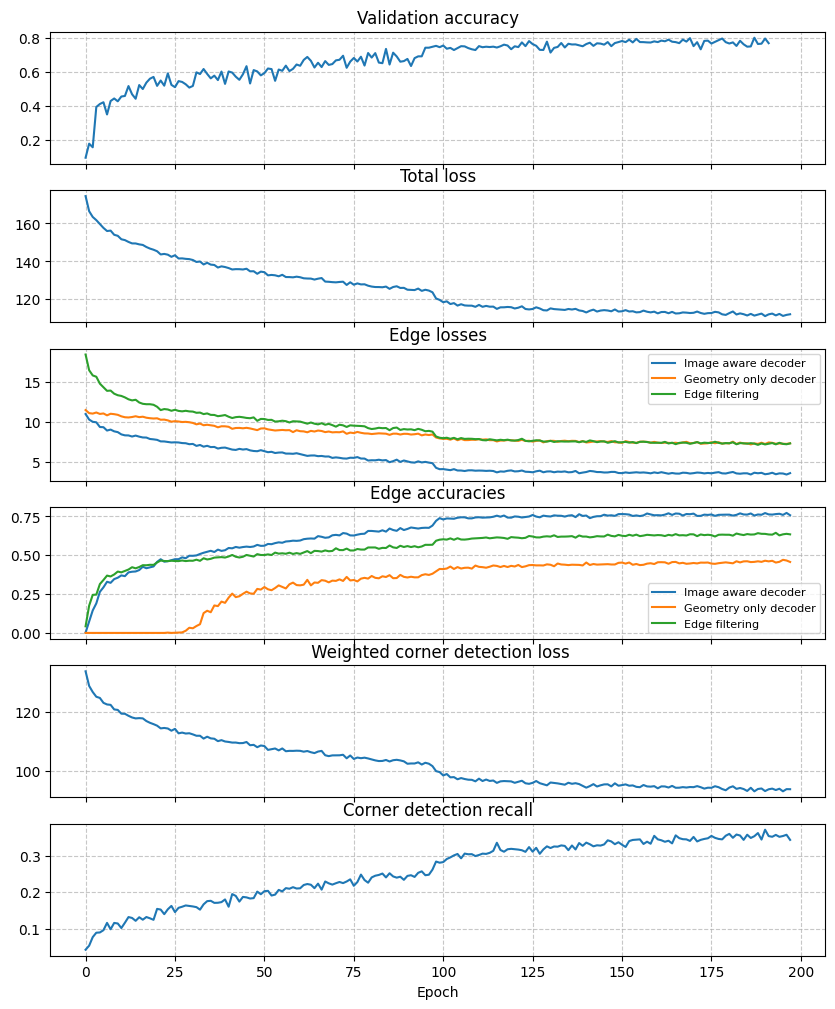

In [10]:
fig, axs = plt.subplots(6, figsize=(10, 12), sharex=True)

for ax in axs:
    ax.grid( linestyle='dashed', alpha=0.7)
axs[0].plot(val)
axs[0].set_title('Validation accuracy')
axs[1].plot([m['loss'] for m in metrics])
axs[1].set_title('Total loss')
axs[2].plot([m['loss_e_s2_hb'] for m in metrics], label='Image aware decoder')
axs[2].plot([m['loss_e_s2_rel'] for m in metrics], label='Geometry only decoder')
axs[2].plot([m['loss_e_s1'] for m in metrics], label='Edge filtering')
axs[2].set_title('Edge losses')
axs[2].legend(fontsize=8)
axs[3].plot([m['edge_acc_s2_hb'] for m in metrics], label='Image aware decoder')
axs[3].plot([m['edge_acc_s2_rel'] for m in metrics], label='Geometry only decoder')
axs[3].plot([m['edge_acc_s1'] for m in metrics], label='Edge filtering')
axs[3].set_title('Edge accuracies')
axs[3].legend(fontsize=8)
axs[4].plot([0.05*m['loss_c_s1'] for m in metrics])
axs[4].set_title(' Weighted corner detection loss')
axs[5].plot([m['corner_recall'] for m in metrics], label='Corner detection recall')
axs[5].set_title('Corner detection recall')
axs[5].set_xlabel('Epoch')

